C:\Users\leela\AppData\Local\Temp\ipykernel_12468\1608306668.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.resample('D').sum().fillna(method='ffill')


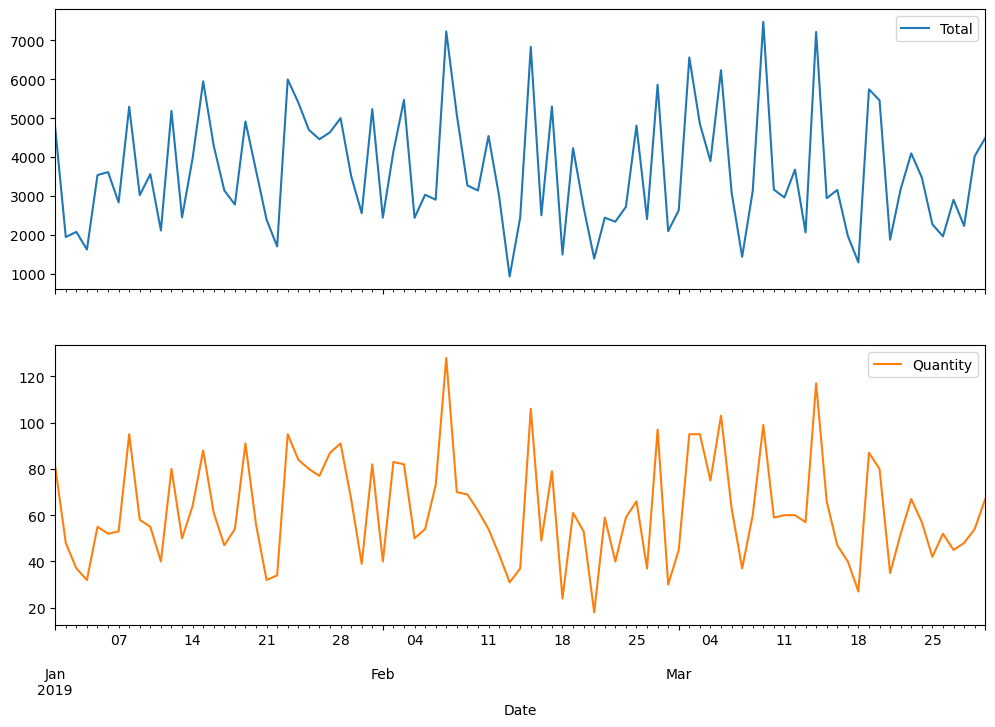

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       19.14*      19.21*  2.063e+08*      19.17*
1        19.20       19.41   2.188e+08       19.29
2        19.24       19.59   2.270e+08       19.38
3        19.36       19.84   2.553e+08       19.55
4        19.45       20.07   2.802e+08       19.69
5        19.52       20.29   3.030e+08       19.82
6        19.55       20.46   3.136e+08       19.90
7        19.65       20.70   3.495e+08       20.06
8        19.73       20.92   3.827e+08       20.20
9        19.77       21.09   4.026e+08       20.29
10       19.85       21.31   4.422e+08       20.42
11       19.91       21.52   4.816e+08       20.54
--------------------------------------------------


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r"C:\Users\leela\OneDrive\Desktop\supermarket_sales - Sheet1.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select multiple time series columns
# We'll use 'Total' and 'Quantity' for multivariate modeling
data = df[['Total', 'Quantity']]

# Resample daily and fill missing values
data = data.resample('D').sum().fillna(method='ffill')

# Optional: plot the series
data.plot(subplots=True, figsize=(12,8))
plt.show()

# Split into training and testing sets
n_obs = int(len(data) * 0.8)
train, test = data[:n_obs], data[n_obs:]

# Fit the VAR model
model = VAR(train)

# Select the best lag order automatically
lag_order = model.select_order()
print(lag_order.summary())

# Use the best selected lag (e.g., AIC)
best_lag = lag_order.aic
fitted_model = model.fit(best_lag)

# Forecast
forecast_steps = len(test)
forecast = fitted_model.forecast(train.values[-best_lag:], steps=forecast_steps)

# Convert forecast into a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Total_Pred', 'Quantity_Pred'])

# Plot results
plt.figure(figsize=(14,8))

# Total Sales
plt.subplot(2,1,1)
plt.plot(train['Total'], label='Train Total')
plt.plot(test['Total'], label='Test Total', color='green')
plt.plot(forecast_df['Total_Pred'], label='Forecast Total', color='red')
plt.title('Total Sales Forecast')
plt.legend()

# Quantity
plt.subplot(2,1,2)
plt.plot(train['Quantity'], label='Train Quantity')
plt.plot(test['Quantity'], label='Test Quantity', color='green')
plt.plot(forecast_df['Quantity_Pred'], label='Forecast Quantity', color='red')
plt.title('Quantity Forecast')
plt.legend()

plt.tight_layout()
plt.show()
